# ESI for "Understanding the Photocatalytic Activity of La5Ti2MS5O7 (M = Ag, Cu): Computational Insights" 


In [49]:
import pandas as pd
import numpy as np 
import os

# pymatgen 
from pymatgen.core import Structure
from pymatgen.core.lattice import Lattice
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.io.vasp.inputs import Kpoints, Incar
from pymatgen.core.surface import SlabGenerator, generate_all_slabs
from pymatgen.analysis.wulff import WulffShape 

## Unit cell relaxation

The unit cells were relaxed with the PBEsol functional, using the following POTCARs: La, Ti_sv, Ag, Cu, O, S. The following code block parses the relaxed and unrelaxed unit cells in the `bulk_structures` folder:

In [15]:
df_lta_list = []
df_ltc_list = []
for root, fols, files in os.walk('bulk_structures/'): 
    for file in files: 
        if file.endswith('.vasp') and 'LTA' in file and not 'checkpoint' in file: 
            struc = Structure.from_file('bulk_structures/{}'.format(file))
            latt = struc.lattice
            name = file.split('.')[0]
            df_lta_list.append({'name': name, 
                           'spacegroup': struc.get_space_group_info(), 
                           'a': latt.a,
                           'b': latt.b,
                           'c': latt.c, 
                           'alpha': latt.alpha, 
                           'beta': latt.beta, 
                           'gamma': latt.gamma})
        elif file.endswith('vasp') and not 'checkpoint' in file: 
            struc = Structure.from_file('bulk_structures/{}'.format(file))
            latt = struc.lattice
            name = file.split('.')[0]
            df_ltc_list.append({'name': name, 
                           'spacegroup': struc.get_space_group_info(symprec=1e-5), 
                           'a': latt.a,
                           'b': latt.b,
                           'c': latt.c, 
                           'alpha': latt.alpha, 
                           'beta': latt.beta, 
                           'gamma': latt.gamma})

lta_structures = pd.DataFrame(df_lta_list)
ltc_structures = pd.DataFrame(df_ltc_list)

In [16]:
lta_structures

,name,spacegroup,a,b,c,alpha,beta,gamma
0,POSCAR_LTA,"(Pnma, 62)",19.593000,3.9963,18.297300,90.0,90.000000,90.0
1,CONTCAR_LTA_pbesol,"(Pnma, 62)",19.381413,3.9349,18.101826,90.0,89.999992,90.0


In [17]:
ltc_structures

,name,spacegroup,a,b,c,alpha,beta,gamma
0,CONTCAR_LTC_Pnma_pbesol,"(Pnma, 62)",19.253580,3.925413,17.973631,90.000000,90.000000,90.000000
1,POSCAR_LTC,"(Pnma, 62)",19.423000,3.979300,18.119101,90.000000,90.000000,90.000000
2,CONTCAR_LTC_P1_pbesol,"(P1, 1)",19.256252,3.925551,17.976881,89.999977,90.000267,89.999962


## Creation of surface slabs
[surfaxe](https://doi.org/10.21105/joss.03171) was developed to automate the generation of surface slabs. The following shows how the slabs were created for LTA but the same scripts were used for LTC, with same Miller indices present as the systems are isostructural. 

In [20]:
conventional_LTA = Structure.from_file('bulk_structures/CONTCAR_LTA_pbesol.vasp')
conventional_LTA.add_oxidation_state_by_guess()
slabgen = generate_all_slabs(conventional_LTA, 2, 10, 10)

From all the slabs generated up to a maximum Miller index of 2, these are the terminations with zero dipole and inversion (Laue) symmetry: 

In [27]:
possible_slabs = []
for slab in slabgen: 
    if slab.is_symmetric() and not slab.is_polar(): 
        possible_slabs.append(slab.miller_index)

possible_slabs.sort()
possible_slabs

[(0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 2),
 (1, 2, 2),
 (2, 0, 1),
 (2, 1, 1),
 (2, 1, 2)]

We also investigated the (001) surface even though it only contained mirror symmetry as it was experimentally observed in selected area electron diffraction patterns. 

For the (101) surface where two symmetric, zero dipole terminations occured only the lowest energy surface was studied. 


## Surface relaxation 

The same INCAR template was used for slab relaxations with addition of `AMIN=0.01` and `LREAL=Auto` to account for large unit cell size. The structures of all unrelaxed and relaxed slabs are in the `surface_slabs` folder. 

The reciprocal space sampling was kept consistent between bulk and slab - see surface energy  tables below 


## Surface energies
Surface energy, $\gamma$, is calculated from: 

$\gamma = \frac{E_{slab} - N E_{bulk}}{2A}$

where $E_{slab}$ is the total energy of the slab, $N$ is the number of atoms in the slab, $E_{bulk}$ is the total bulk energy per atom and $A$ is the area of the slab. 

For LTA $E_{bulk} =$ -8.011 eV / atom

For LTC $E_{bulk} =$ -8.078 eV / atom

The following surface energies are calculated from energies of PBEsol-relaxed slabs. 

In [39]:
LTA_surface_energies = pd.read_csv('LTA_surface_energies.csv')

In [40]:
LTA_surface_energies

,hkl,kpoints,atoms,area,total_energy,surface_energy
0,(001),5x1x1,160,76.26,-1269.98,1.244
1,(010),1x1x1,240,350.84,-1881.97,0.931
2,(011),1x1x1,240,359.03,-1870.37,1.168
3,(100),5x1x1,160,71.23,-1274.69,0.801
4,(101),5x1x1,160,104.35,-1271.17,0.817
5,(102),5x1x1,480,168.34,-3827.25,0.866
6,(110),1x1x1,240,358.00,-1880.15,0.953
7,(112),1x1x1,480,389.14,-3793.49,1.070
8,(122),1x1x1,640,721.59,-5025.79,1.127
9,(201),5x1x1,320,161.59,-2533.46,1.496


In [47]:
LTC_surface_energies = pd.read_csv('LTC_surface_energies.csv')

In [48]:
LTC_surface_energies

,hkl,kpoints,atoms,area,total_energy,surface_energy
0,(001),5x1x1,160,75.59,-1281.15,1.207
1,(010),1x1x1,240,346.17,-1897.99,0.944
2,(011),1x1x1,240,354.32,-1890.41,1.094
3,(100),5x1x1,160,70.57,-1285.58,0.790
4,(101),5x1x1,160,103.41,-1281.45,0.859
5,(102),5x1x1,480,166.84,-3858.71,0.908
6,(110),1x1x1,240,353.29,-1894.50,1.004
7,(112),1x1x1,480,384.28,-3825.65,1.083
8,(122),1x1x1,640,712.15,-5067.91,1.150
9,(201),5x1x1,320,160.11,-2553.69,1.570


## Wulff constructions

These are created using `pymatgen.analysis.wulff` module 

In [55]:
lattice_LTA = Structure.from_file('bulk_structures/CONTCAR_LTA_pbesol.vasp').lattice
lattice_LTC = Structure.from_file('bulk_structures/CONTCAR_LTC_P1_pbesol.vasp').lattice

surfen_LTA = LTA_surface_energies['surface_energy'].to_list()
surfen_LTC = LTC_surface_energies['surface_energy'].to_list()

hkl_list = [(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,0,2),(1,1,0),(1,-1,2),(1,2,2),(2,0,1),(-2,1,1),(2,1,2)]



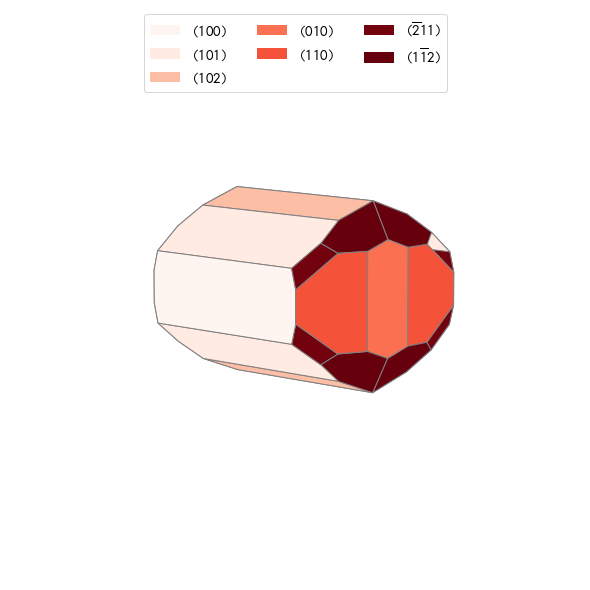

In [56]:
wulff_LTA = WulffShape(lattice_LTA, hkl_list, surfen_LTA)
plot = wulff_LTA.get_plot(color_set='Reds',direction=(1,5.5,-0.2))

In [62]:
print("anisotropy: %.3f" %(wulff_LTA.anisotropy))
print("shape factor: %.3f" %(wulff_LTA.shape_factor))
print("weighted surface energy: %.3f \n" %(wulff_LTA.weighted_surface_energy))
print('fractional area covered by each Miller index:')
wulff_LTA.area_fraction_dict

anisotropy: 0.103
shape factor: 5.357
weighted surface energy: 0.886 

fractional area covered by each Miller index:


{(0, 0, 1): 0.0,
 (0, 1, 0): 0.06577417548312552,
 (0, 1, 1): 0.0,
 (1, 0, 0): 0.1758082395765642,
 (1, 0, 1): 0.2928665289688184,
 (1, 0, 2): 0.17613249364298472,
 (1, 1, 0): 0.1444052528944995,
 (1, -1, 2): 0.10587106728775379,
 (1, 2, 2): 0.0,
 (2, 0, 1): 0.0,
 (-2, 1, 1): 0.03914224214625404,
 (2, 1, 2): 0.0}

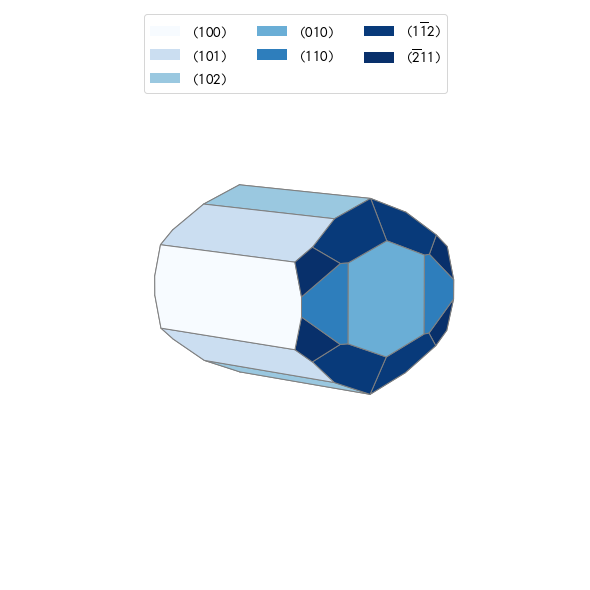

In [58]:
wulff_LTC = WulffShape(lattice_LTC, hkl_list, surfen_LTC)
plot = wulff_LTC.get_plot(color_set='Blues',direction=(1,5.5,-0.2))

In [63]:
print("anisotropy: %.3f" %(wulff_LTC.anisotropy))
print("shape factor: %.3f" %(wulff_LTC.shape_factor))
print("weighted surface energy: %.3f \n" %(wulff_LTC.weighted_surface_energy))
print('fractional area covered by each Miller index:')
wulff_LTC.area_fraction_dict

anisotropy: 0.110
shape factor: 5.347
weighted surface energy: 0.914 

fractional area covered by each Miller index:


{(0, 0, 1): 0.0,
 (0, 1, 0): 0.11122909010757123,
 (0, 1, 1): 0.0,
 (1, 0, 0): 0.20596351870190255,
 (1, 0, 1): 0.2574544053446218,
 (1, 0, 2): 0.17632699201553137,
 (1, 1, 0): 0.06327952409646145,
 (1, -1, 2): 0.13587705249805707,
 (1, 2, 2): 0.0,
 (2, 0, 1): 0.0,
 (-2, 1, 1): 0.049869417235854564,
 (2, 1, 2): 0.0}

## Band alignment

Ionisation potential (IP) and electron affinity (EA) were calculated from: 

$IP = (E_{slab,vac}-E_{slab,core}) - (E_{bulk,VBM} - E_{bulk,core})$

$EA = IP - E_g$

where $E_{slab,vac}$ is the potential of vacuum in the slab, $E_{slab,core}$ is the core level in the slab (taken from the bulk-like region), $E_{bulk,VBM}$ is the valence band maximum energy of the bulk and $E_{bulk,core}$ is the core level in the bulk. Surface band gap ($E_g$ was taken to be the difference between the highest energy occupied and lowest energy unoccupied bands in the DOS of the slabs. 

LTA bulk energies: 

- $E_{core}$ = -61.854 eV, 1s energy of O(62)

- $E_{VBM}$ = 6.132 eV 

LTC bulk energies:

- $E_{core}$ = -61.031 eV, 1s energy of O(59)

- $E_{VBM}$ = 6.323 eV 

As band alignment was calculated from hybrid HSE06 calculateions, only the surfaces that actually appeared on the Wulff construction were examined. The calculated IP and EA are below, while the actual band alignment diagrams were drawn with [bapt](https://github.com/utf/bapt) 

In [66]:
LTA_ipea = pd.read_csv('LTA_IP_EA.csv')
LTA_ipea

,hkl,bandgap,IP,EA
0,(010),2.635,5.6326,2.9976
1,(100),1.759,6.1996,4.4406
2,(101),0.887,5.9575,5.0705
3,(102),0.372,6.9391,6.5671
4,(110),2.472,5.7242,3.2522
5,(112),1.558,6.9134,5.3554
6,(211),2.481,5.8870,3.4060


In [67]:
LTC_ipea = pd.read_csv('LTC_IP_EA.csv')
LTC_ipea

,hkl,bandgap,IP,EA
0,(010),2.858,4.9292,2.0712
1,(100),1.687,5.7898,4.1028
2,(101),1.207,5.4068,4.1998
3,(102),0.050,5.7843,5.7343
4,(110),2.430,5.0702,2.6402
5,(112),1.802,5.7453,3.9433
6,(211),2.565,5.4089,2.8439
